In [10]:
import io
import requests
from PIL import Image
from torchvision import models, transforms
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

In [11]:
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
IMG_URL = 'https://s3.amazonaws.com/outcome-blog/wp-content/uploads/2017/02/25192225/cat.jpg'

In [12]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Scale(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

c:\users\msuryava\appdata\local\programs\python\python36\lib\site-packages\torchvision\transforms\transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


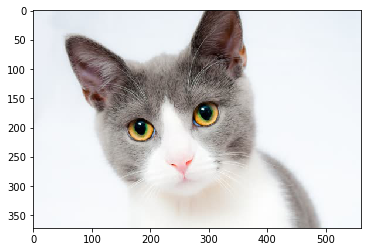

In [13]:
response = requests.get(IMG_URL)
img_pil = Image.open(io.BytesIO(response.content))
imshow(np.asarray(img_pil))

In [14]:
squeeze = models.squeezenet1_1(pretrained=True)

c:\users\msuryava\appdata\local\programs\python\python36\lib\site-packages\torchvision\models\squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
c:\users\msuryava\appdata\local\programs\python\python36\lib\site-packages\torchvision\models\squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)
Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to C:\Users\msuryava/.torch\models\squeezenet1_1-f364aa15.pth
100%|███████████████████████████████████████████████████████████████████| 4966400/4966400 [00:01<00:00, 2831968.36it/s]


In [16]:
img_tensor = preprocess(img_pil)
img_tensor.unsqueeze_(0)
fc_out = squeeze(img_tensor)

In [18]:
labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

In [19]:
print(labels[fc_out.data.numpy().argmax()])

tabby, tabby cat
